In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [3]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

## 1. 图像的裁剪、放大和缩小

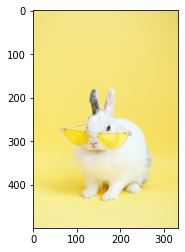

In [3]:
img = cv.imread('pic/rabbit500x333.jpg')
show(img)

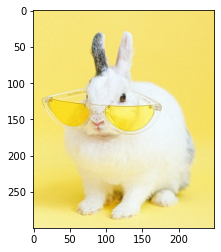

In [4]:
rabbit = img[150:450, 50:300, :]
show(rabbit)

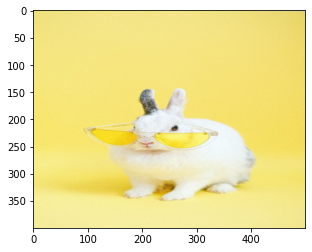

In [5]:
# opencv x, y
img2 = cv.resize(img, (500, 400))
show(img2)

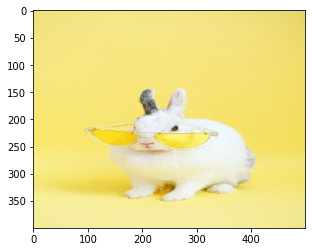

In [6]:
img3 = cv.resize(img, (500, 400), interpolation=cv.INTER_NEAREST)
show(img3)

## 2. 平移变换

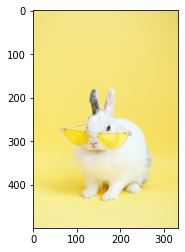

In [18]:
img = cv.imread('pic/rabbit500x333.jpg')
show(img)

In [19]:
M = np.array([
    [1, 0, 100],
    [0, 1, 50]
], dtype=np.float32)

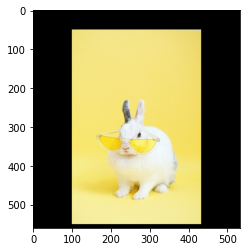

In [22]:
img2 = cv.warpAffine(img, M, (533, 560))
show(img2)

## 3. 错切变换

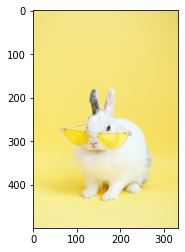

In [23]:
img = cv.imread('pic/rabbit500x333.jpg')
show(img)

In [24]:
M = np.array([
    [1, 0.2, 0],
    [0, 1,   0]
], dtype=np.float32)

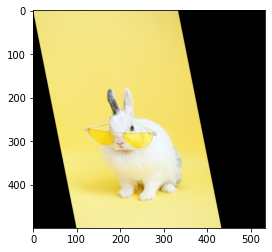

In [26]:
img3 = cv.warpAffine(img, M, (533,500))
show(img3)

In [27]:
M = np.array([
    [1, 0, 0],
    [0.3, 1,   0]
], dtype=np.float32)

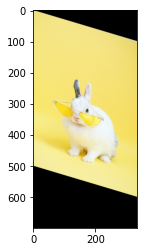

In [29]:
img3 = cv.warpAffine(img, M, (333,700))
show(img3)

## 4. 镜像变换

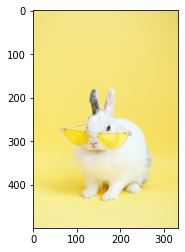

In [39]:
img = cv.imread('pic/rabbit500x333.jpg')
show(img)

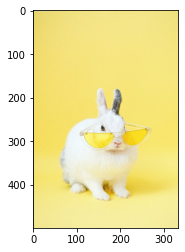

In [40]:
Mx = np.array([
    [-1, 0, 333],
    [0,  1, 0]
], dtype=np.float32)

img2 = cv.warpAffine(img, Mx, (333, 500))
show(img2)

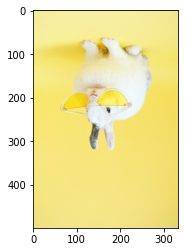

In [41]:
My = np.array([
    [1, 0, 0],
    [0, -1, 500]
], dtype=np.float32)

img3 = cv.warpAffine(img, My, (333, 500))
show(img3)

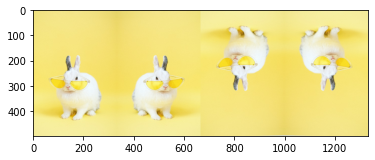

In [42]:
img4 = cv.flip(img, 1)
img5 = cv.flip(img, 0)
img6 = cv.flip(img, -1)

show(np.hstack([img, img4, img5, img6]))

## 5. 旋转变换

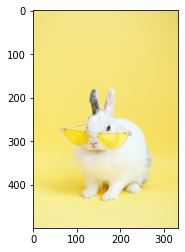

In [43]:
img = cv.imread('pic/rabbit500x333.jpg')
show(img)

In [44]:
beta = np.pi / 4
M = np.array([
    [np.cos(beta), np.sin(beta), 0],
    [-np.sin(beta), np.cos(beta), 0]
], dtype=np.float32)

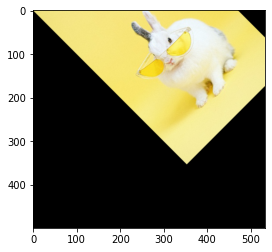

In [46]:
img2 = cv.warpAffine(img, M, (533, 500))
show(img2)

In [47]:
h, w, c = img.shape

In [50]:
M2 = cv.getRotationMatrix2D((w//2, h//2), 45, 1)
M2

array([[   0.70710678,    0.70710678, -128.15642097],
       [  -0.70710678,    0.70710678,  190.60303038]])

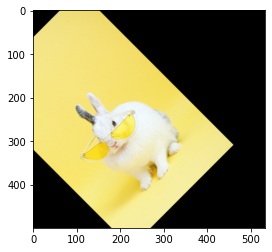

In [51]:
img3 = cv.warpAffine(img, M2, (533, 500))
show(img3)

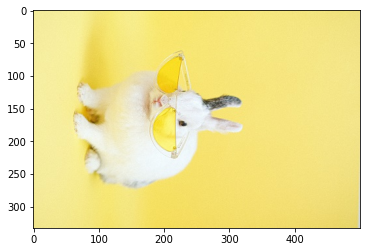

In [52]:
img4 = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
show(img4)

## 6. 透视变换

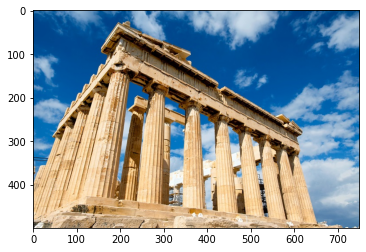

In [53]:
img = cv.imread('pic/parthenon500x750.jpg')
show(img)

In [54]:
src = np.array([
    [210, 50],
    [610, 270],
    [650, 470],
    [150, 450]
], dtype=np.float32)

In [56]:
dst = np.array([
   [150, 50],
   [650, 50],
   [650, 470],
   [150, 470]
], dtype=np.float32)

In [57]:
M = cv.getPerspectiveTransform(src, dst)
M

array([[ 2.42579996e-01,  1.48606482e-01,  5.57711218e+01],
       [-6.29159000e-01,  1.05624991e+00,  1.17358643e+02],
       [-1.27104151e-03,  5.57473657e-04,  1.00000000e+00]])

In [58]:
h, w, c = img.shape

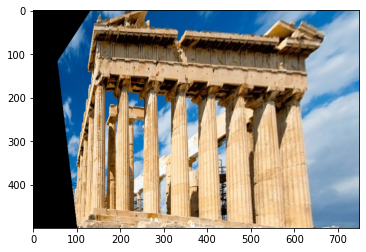

In [59]:
img2 = cv.warpPerspective(img, M, (w, h))
show(img2)

## 7. 插值比较

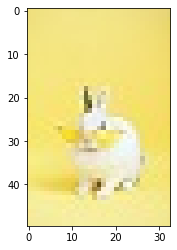

In [21]:
img = cv.imread('pic/rabbit50x33.jpg')
show(img)

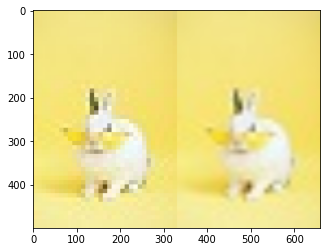

In [22]:
img1 = cv.resize(img, (330, 500), interpolation=cv.INTER_NEAREST)
img2 = cv.resize(img, (330, 500), interpolation=cv.INTER_LINEAR_EXACT)

show(np.hstack([img1, img2]))